In [1]:
import numpy as np 
import importlib; 
import os
if "add_engmod.py" in os.listdir(): print("Exists!"); import add_engmod
import engmod.structfem as sfem; importlib.reload(sfem)
import matplotlib.pyplot as plt 
%matplotlib inline

Exists!
Added module.


In [2]:
# The total length of the beam. 
L_beam = 2 
# The Young's modulus in Pa
E = 200E9

d0 = 10/1000
r0 = d0/2
d1 = 5/1000
r1 = d1/2

D = float(d0)
d = float(d1)

# The area moment of inertia:
I0 = np.pi/4 * r0**4
I1 = np.pi/4 * r1**4


A0 = np.pi * r0**2
A1 = np.pi * r1**2

print(A0,A1,I0,I1)

# The density (only important for dynamic analyses)
rho = 7800
# The force applied to the structure. 
F = 50

7.853981633974483e-05 1.9634954084936207e-05 4.908738521234052e-10 3.067961575771282e-11


In [3]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam*0.75,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 1, in the 1 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([1,1,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = []
# Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
prescribed_forces.append(np.array([2,1,-abs(F)]))
# Convert the prescribed force list to an array:
prescribed_forces = np.array(prescribed_forces)

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.array([I0,I1])
# Cross-sectional area [m^2]
elemprop["A"] = np.array([A0,A1])
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


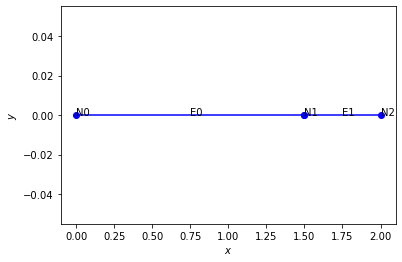

In [4]:
fmn.plot_system()

In [5]:
fmn.solve()

{'displacements': array([ 0.        ,  0.        ,  0.06366198,  0.        ,  0.        ,
        -0.12732395,  0.        , -0.40319252, -1.14591559]),
 'loads': array([  0.        , -16.66666667,   0.        ,   0.        ,
         66.66666667,   0.        ,   0.        , -50.        ,
          0.        ])}

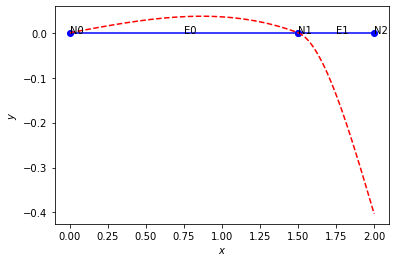

In [6]:
fmn.plot_system(show_displacement=True)

In [7]:
print(fmn.post_get_displacement(2,1)*1000)

-403.19252249946845


In [8]:
fmn.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.063662, F_x: 0.000000, F_y: -16.666667, M_z: 0.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: -0.127324, F_x: 0.000000, F_y: 66.666667, M_z: 0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: -403.192522 x 10^-3, angle: -1.145916, F_x: 0.000000, F_y: -50.000000, M_z: 0.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Normal stress due to axial load (only): 0.000000 x 10^6
                     Element 1                     
Normal stress due to axial load (only): 0.000000 x 10^6

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************


Text(0.5, 0, 'Location on the x-axis')

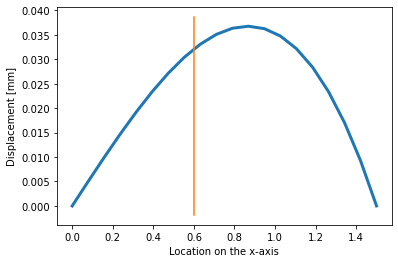

In [9]:
dict_moment = fmn.post_get_displacement_element(0)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["y_displ"],label="EngMod - Element 0",linewidth=3)
plt.plot(0.3*L_beam*np.ones(2),plt.ylim())
plt.ylabel("Displacement [mm]")
plt.xlabel("Location on the x-axis")


Minimum bending moment: -25.000000000000014
Maximum bending moment: 0.0


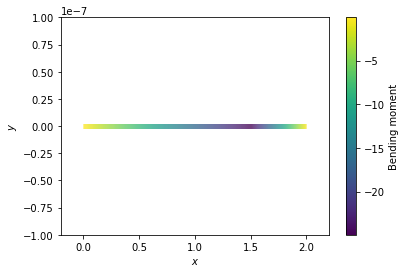

In [10]:
fmn.post_plot_bending_moment()

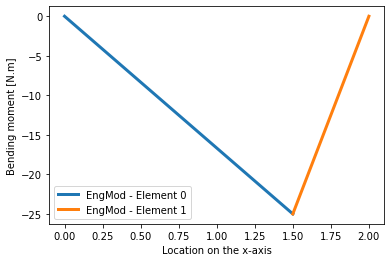

In [12]:
dict_moment = fmn.post_get_bending_moment(0)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"],label="EngMod - Element 0",linewidth=3)
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

dict_moment = fmn.post_get_bending_moment(1)

plt.figure(1)
plt.plot(dict_moment["x_coor"],dict_moment["moment"],label="EngMod - Element 1",linewidth=3)
plt.ylabel("Bending moment [N.m]")
plt.xlabel("Location on the x-axis")

plt.legend()
